In [14]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [15]:
'''
In the below example we see a 1D linear regression example: 
y=wx+b
'''
x = torch.tensor(range(-5,5)).float()
x

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [16]:
w_gt = 3
b_gt = 4
y = w_gt*x + b_gt
y

tensor([-11.,  -8.,  -5.,  -2.,   1.,   4.,   7.,  10.,  13.,  16.])

In [17]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(f'w: {w}')
print(f'b: {b}')

w: tensor([-0.7436], requires_grad=True)
b: tensor([1.2372], requires_grad=True)


In [18]:
learning_rate = 0.01

In [19]:
def trainManual(w, b, lr, iternum):
    for i in range(iternum):
        y_hat = w*x + b

        error = torch.sum(torch.pow(y-y_hat,2)/y.numel())
        error.backward()   # Compute the Gradients for w and b (requires_grad=True)
        print(w,w.grad)
        # Update parameters
        with torch.no_grad():   # Temporarily set all requires_grad=False
            w -= lr * w.grad
            b -= lr * b.grad
            # Remember to zero the gradients!
            # If not, the gradients will be accumulated
            w.grad.zero_()
            b.grad.zero_()
        print("Error: {:.4f}".format(error))

In [20]:
trainManual(w, b, learning_rate, 100)

tensor([-0.7436], requires_grad=True) tensor([-60.8780])
Error: 116.4122
tensor([-0.1348], requires_grad=True) tensor([-50.5466])
Error: 82.4588
tensor([0.3707], requires_grad=True) tensor([-41.9772])
Error: 59.0142
tensor([0.7904], requires_grad=True) tensor([-34.8692])
Error: 42.8010
tensor([1.1391], requires_grad=True) tensor([-28.9732])
Error: 31.5648
tensor([1.4289], requires_grad=True) tensor([-24.0824])
Error: 23.7552
tensor([1.6697], requires_grad=True) tensor([-20.0252])
Error: 18.3054
tensor([1.8699], requires_grad=True) tensor([-16.6594])
Error: 14.4818
tensor([2.0365], requires_grad=True) tensor([-13.8670])
Error: 11.7794
tensor([2.1752], requires_grad=True) tensor([-11.5503])
Error: 9.8511
tensor([2.2907], requires_grad=True) tensor([-9.6279])
Error: 8.4578
tensor([2.3870], requires_grad=True) tensor([-8.0327])
Error: 7.4350
tensor([2.4673], requires_grad=True) tensor([-6.7087])
Error: 6.6696
tensor([2.5344], requires_grad=True) tensor([-5.6099])
Error: 6.0836
tensor([2.59

In [21]:
y_pred = (w*x + b)
y_pred = y_pred.data.numpy()
print("----- ----- ----- ----- -----")
print("Prediction:")
print("w_pred = {:.2f}, b_pred = {:.2f}".format(w[0] ,b[0]))
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

----- ----- ----- ----- -----
Prediction:
w_pred = 2.97, b_pred = 3.57
Ground-truth:
w_gt = 3.00, b_gt = 4.00


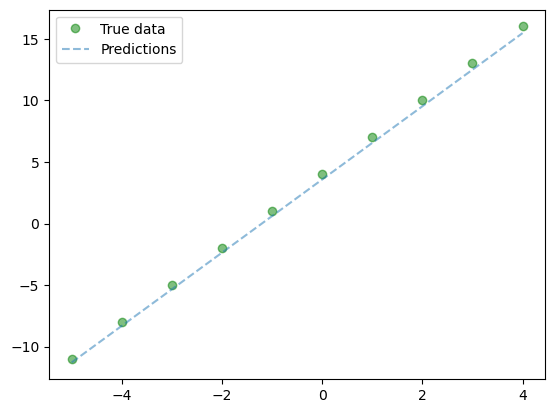

In [22]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, y_pred, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

# Linear regression - Using the torch.nn.Module

In [23]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

In [24]:
class LinearRegression(torch.nn.Module): 
    def __init__(self):
        super(LinearRegression, self).__init__() 
        self.linear = torch.nn.Linear(1, 1, bias = True) # bias is default True

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [25]:
our_model = LinearRegression()

In [26]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01) 

In [27]:
def trainBuildIn(model, x, y, iter):
    for i in range(iter):
        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
        optimizer.zero_grad()
        
        # get output from the model, given the inputs
        y_pred = model(x)

        # get loss for the predicted output
        loss = criterion(y_pred, y)
        print(loss)
        # get gradients w.r.t to parameters
        loss.backward()

        # update parameters
        optimizer.step()

        print('Iter {}, loss {}'.format(iter, loss.item()))

In [28]:
x_train = x[:,None]
y_train = y[:,None]

print(x.shape, x_train.shape)
print(y.shape, y_train.shape)

torch.Size([10]) torch.Size([10, 1])
torch.Size([10]) torch.Size([10, 1])


In [32]:
trainBuildIn(our_model, x_train, y_train, 100)

tensor(9.9623, grad_fn=<MseLossBackward0>)
Iter 100, loss 9.962328910827637
tensor(8.8491, grad_fn=<MseLossBackward0>)
Iter 100, loss 8.849067687988281
tensor(8.0069, grad_fn=<MseLossBackward0>)
Iter 100, loss 8.00688648223877
tensor(7.3541, grad_fn=<MseLossBackward0>)
Iter 100, loss 7.354081630706787
tensor(6.8343, grad_fn=<MseLossBackward0>)
Iter 100, loss 6.834346771240234
tensor(6.4088, grad_fn=<MseLossBackward0>)
Iter 100, loss 6.408846855163574
tensor(6.0508, grad_fn=<MseLossBackward0>)
Iter 100, loss 6.050766944885254
tensor(5.7416, grad_fn=<MseLossBackward0>)
Iter 100, loss 5.741564750671387
tensor(5.4684, grad_fn=<MseLossBackward0>)
Iter 100, loss 5.468389987945557
tensor(5.2223, grad_fn=<MseLossBackward0>)
Iter 100, loss 5.222311496734619
tensor(4.9971, grad_fn=<MseLossBackward0>)
Iter 100, loss 4.997097969055176
tensor(4.7884, grad_fn=<MseLossBackward0>)
Iter 100, loss 4.788381099700928
tensor(4.5931, grad_fn=<MseLossBackward0>)
Iter 100, loss 4.593068599700928
tensor(4.4090

In [33]:
y_pred_bi = our_model(x_train).data.numpy()

print("----- ----- ----- ----- -----")
print("Prediction:")
for name, param in our_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

----- ----- ----- ----- -----
Prediction:
linear.weight tensor([[2.9742]])
linear.bias tensor([3.6112])
Ground-truth:
w_gt = 3.00, b_gt = 4.00


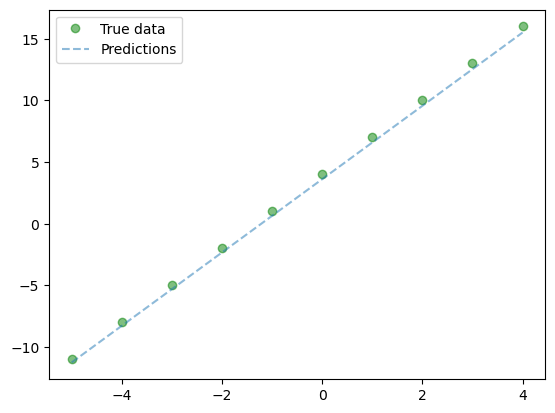

In [34]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, y_pred_bi, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [35]:
'''
    Validation with SKLEARN

'''
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x[:,None], y[:,None])
print("----- ----- ----- ----- -----")
print("Prediction:")
print("w_pred = {:.2f}, b_pred = {:.2f}".format(float(linr.intercept_), float(linr.coef_[0])))
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

----- ----- ----- ----- -----
Prediction:
w_pred = 4.00, b_pred = 3.00
Ground-truth:
w_gt = 3.00, b_gt = 4.00
